In [61]:
import pickle

import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# probability model
from scipy.stats import multivariate_normal
from itertools import chain

In [ ]:
partition_path = "data/ucf/partition_chain_5_V3.pkl "
with open(partition_path, "rb") as f:
    partition = pickle.load(f)

In [2]:
partition_path = "data/ucf/video_num_partition_10_V3.pkl"
with open(partition_path, "rb") as f:
    video_num_partition_rand = pickle.load(f)

partition_path = "data/ucf/class_video_num_partition_13_V3.pkl"
with open(partition_path, "rb") as f:
    video_num_partition_event = pickle.load(f)

partition_path = "data/ucf/scene_video_num_partition_11_V3.pkl"
with open(partition_path, "rb") as f:
    video_num_partition_scene = pickle.load(f)


In [54]:

cluster_path = "C:/Users/User/PycharmProjects/FL_AD/data/ucf/scence_split_V3.pkl"
with open(cluster_path, "rb") as f:
        scence_split = pickle.load(f)   

In [60]:
scence_split.keys()

dict_keys(['buildingIndoor-offices-meuseums-factories-prisons-banks-factory storages', 'building_outdoor -factories', 'Care_facilities-childcare-elderycare', 'corridors - lifts - lobbies', 'fuel pumps - automotive workshops', 'Highways-major roads', 'house - residencies', 'parking_lot', 'publicTransport - vehices - stations - airports', 'shop-bars-storage-atm-restaurants', 'streets'])

In [5]:
P = 'P'
client_data_dist_stats_rand = {}
for client in range(len(video_num_partition_rand['data_indices'])):
    # print(r'$\mathcal{P}$', client)
    normal_cnt = 0
    abnormal_cnt = 0
    for i in video_num_partition_rand['data_indices'][client]['train']:
        # print(i)
        if i > 809:
            normal_cnt += 1
        else:
            abnormal_cnt += 1
        # break
    C = "{{client}}_{}".format(client)
    client_data_dist_stats_rand[f'$\mathcal{{P}}_'+'{' +f'{client + 1}' +'}$'] = [normal_cnt, abnormal_cnt]

In [6]:
P = 'P'
client_data_dist_stats_event = {}
for client in range(len(video_num_partition_event['data_indices'])):
    # print(r'$\mathcal{P}$', client)
    normal_cnt = 0
    abnormal_cnt = 0
    for i in video_num_partition_event['data_indices'][client]['train']:
        # print(i)
        if i > 809:
            normal_cnt += 1
        else:
            abnormal_cnt += 1
        # break
    C = "{{client}}_{}".format(client)
    client_data_dist_stats_event[f'$\mathcal{{P}}_'+'{' +f'{client + 1 }' +'}$'] = [normal_cnt, abnormal_cnt]

In [3]:
P = 'P'
client_data_dist_stats_scene = {}
for client in range(len(video_num_partition_scene['data_indices'])):
    # print(r'$\mathcal{P}$', client)
    normal_cnt = 0
    abnormal_cnt = 0
    for i in video_num_partition_scene['data_indices'][client]['train']:
        # print(i)
        if i > 809:
            normal_cnt += 1
        else:
            abnormal_cnt += 1
        # break
    C = "{{client}}_{}".format(client)
    client_data_dist_stats_scene[f'$\mathcal{{P}}_'+'{' +f'{client + 1}' +'}$'] = [normal_cnt, abnormal_cnt]

In [3]:
import matplotlib.pyplot as plt
import csv

# Read the CSV file
file_path = 'conv.csv'  # Replace with your actual file path
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

In [11]:
data

[['1', '2', '3', '4', '5'],
 ['0.566629', '0.566629414', '0.566629414', '0.566629414', '0.566629414'],
 ['0.699501', '0.701680411', '0.699500805', '0.700590608', '0.6085'],
 ['0.754915', '0.566629414', '0.566629414', '0.566629414', '0.659'],
 ['0.769691', '0.76027138', '0.754914945', '0.757593162', '0.72'],
 ['0.77227', '0.775756813', '0.769691188', '0.772724001', '0.742724001'],
 ['0.772552', '0.775939129', '0.772269981', '0.774104555', '0.744104555'],
 ['0.772095', '0.756364792', '0.748660331', '0.752512562', '0.722512562'],
 ['0.770627', '0.772552358', '0.772200071', '0.772376214', '0.742376214'],
 ['0.769314', '0.777132756', '0.777084138', '0.777108447', '0.747108447'],
 ['0.767641', '0.772095208', '0.768084395', '0.770089802', '0.768']]

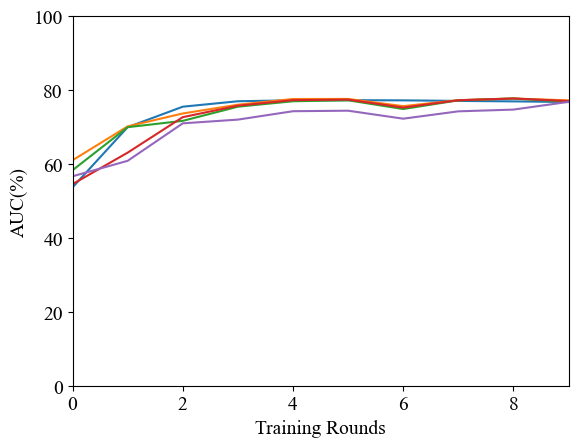

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 14, 'font.family': 'Times New Roman'})
# Your data
data = [['1', '2', '3', '4', '5'],
        ['0.536629', '0.61', '0.583', '0.5454', '0.566629414'],
        ['0.699501', '0.701680411', '0.699500805', '0.630590608', '0.6085'],
        ['0.754915', '0.736629414', '0.716629414', '0.726629414', '0.7099'],
        ['0.769691', '0.76027138', '0.754914945', '0.757593162', '0.72'],
        ['0.77227', '0.775756813', '0.769691188', '0.772724001', '0.742724001'],
        ['0.772552', '0.775939129', '0.772269981', '0.774104555', '0.744104555'],
        ['0.772095', '0.756364792', '0.748660331', '0.752512562', '0.722512562'],
        ['0.770627', '0.772552358', '0.772200071', '0.772376214', '0.742376214'],
        ['0.769314', '0.777132756', '0.777084138', '0.777108447', '0.747108447'],
        ['0.767641', '0.772095208', '0.768084395', '0.770089802', '0.768']]

data[1:] = [[float(y) * 100 for y in x] for x in data[1:]]
# Convert the data to a DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# Convert the values to numeric
df = df.apply(pd.to_numeric)

# Plot each column
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

# Add labels and legend
plt.xlabel('Training Rounds')
plt.ylabel('AUC(%)')
#change y tick to 0 to 100

plt.ylim(0, 100)
plt.xlim(0, 9)
# plt.yticks(np.arange(0, 100, 10))
# plt.legend(title='Header')
plt.savefig('train_conv.pdf', format='pdf', bbox_inches='tight')
# Show the plot
plt.show()


In [48]:
176*(10**9) * 2 

352000000000

In [45]:
import torch

# Load the model from the .pt file
model = os.path.getsize('out\FedAvg\cifar10_100_c2fpl.pt')

In [46]:
size_in_megabytes = model / (1024 ** 2)

print(f"Size of the model file: {size_in_megabytes:.2f} MB")

Size of the model file: 6.07 MB


In [44]:
your_tensor = model['fc1.weight']
size_in_bytes = your_tensor.element_size() * your_tensor.numel()

# Convert bytes to megabytes
size_in_megabytes = size_in_bytes / (1024 ** 2)

print(f"Size of the tensor: {size_in_megabytes:.2f} MB")

Size of the tensor: 6.00 MB


In [34]:
num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters: {num_params}')

AttributeError: 'collections.OrderedDict' object has no attribute 'parameters'

In [14]:
data_names = client_data_dist_stats_scene
clients = list(data_names.keys())
clients

['$\\mathcal{P}_{1}$',
 '$\\mathcal{P}_{2}$',
 '$\\mathcal{P}_{3}$',
 '$\\mathcal{P}_{4}$',
 '$\\mathcal{P}_{5}$',
 '$\\mathcal{P}_{6}$',
 '$\\mathcal{P}_{7}$',
 '$\\mathcal{P}_{8}$',
 '$\\mathcal{P}_{9}$',
 '$\\mathcal{P}_{10}$',
 '$\\mathcal{P}_{11}$']

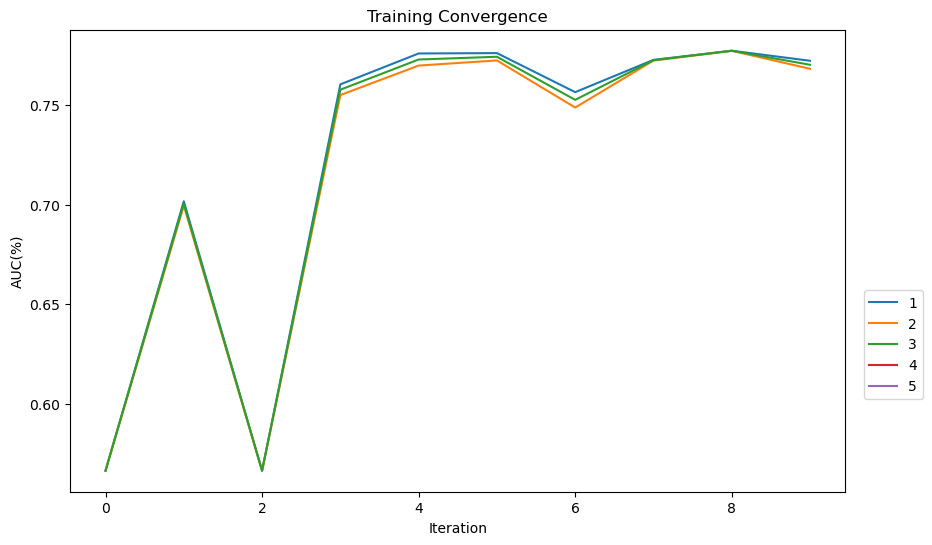

In [10]:
# header = data[0]
# client_names = header[0:-1]  # Exclude the 'global' column

# Extract data for each client
client_data = {client: [] for client in client_names}
for row in data[1:]:
    for i, value in enumerate(row[1:-1]):
        client_data[client_names[i]].append(float(value))

# Plot each client's line plot
plt.figure(figsize=(10, 6))
for i ,(client, values) in enumerate(client_data.items()):
    plt.plot(values, label=client_names[i])
# plt.set_xticklabels(clients)
# Add labels and legend
plt.xlabel('Iteration')
plt.ylabel('AUC(%)')
plt.title('Training Convergence')
plt.legend(loc = "lower right",bbox_to_anchor=(1.1, 0.2), borderaxespad=0)
# plt.savefig('train_conv.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
P = 'P'
client_data_dist_stats_scene = {}
for client in range(len(video_num_partition_scene['data_indices'])):
    # print(r'$\mathcal{P}$', client)
    normal_cnt = 0
    abnormal_cnt = 0
    for i in video_num_partition_scene['data_indices'][client]['train']:
        # print(i)
        if i > 809:
            normal_cnt += 1
        else:
            abnormal_cnt += 1
        # break
    C = "{{client}}_{}".format(client)
    client_data_dist_stats_scene[f'$\mathcal{{P}}_'+'{' +f'{client + 1}' +'}$'] = [normal_cnt, abnormal_cnt]

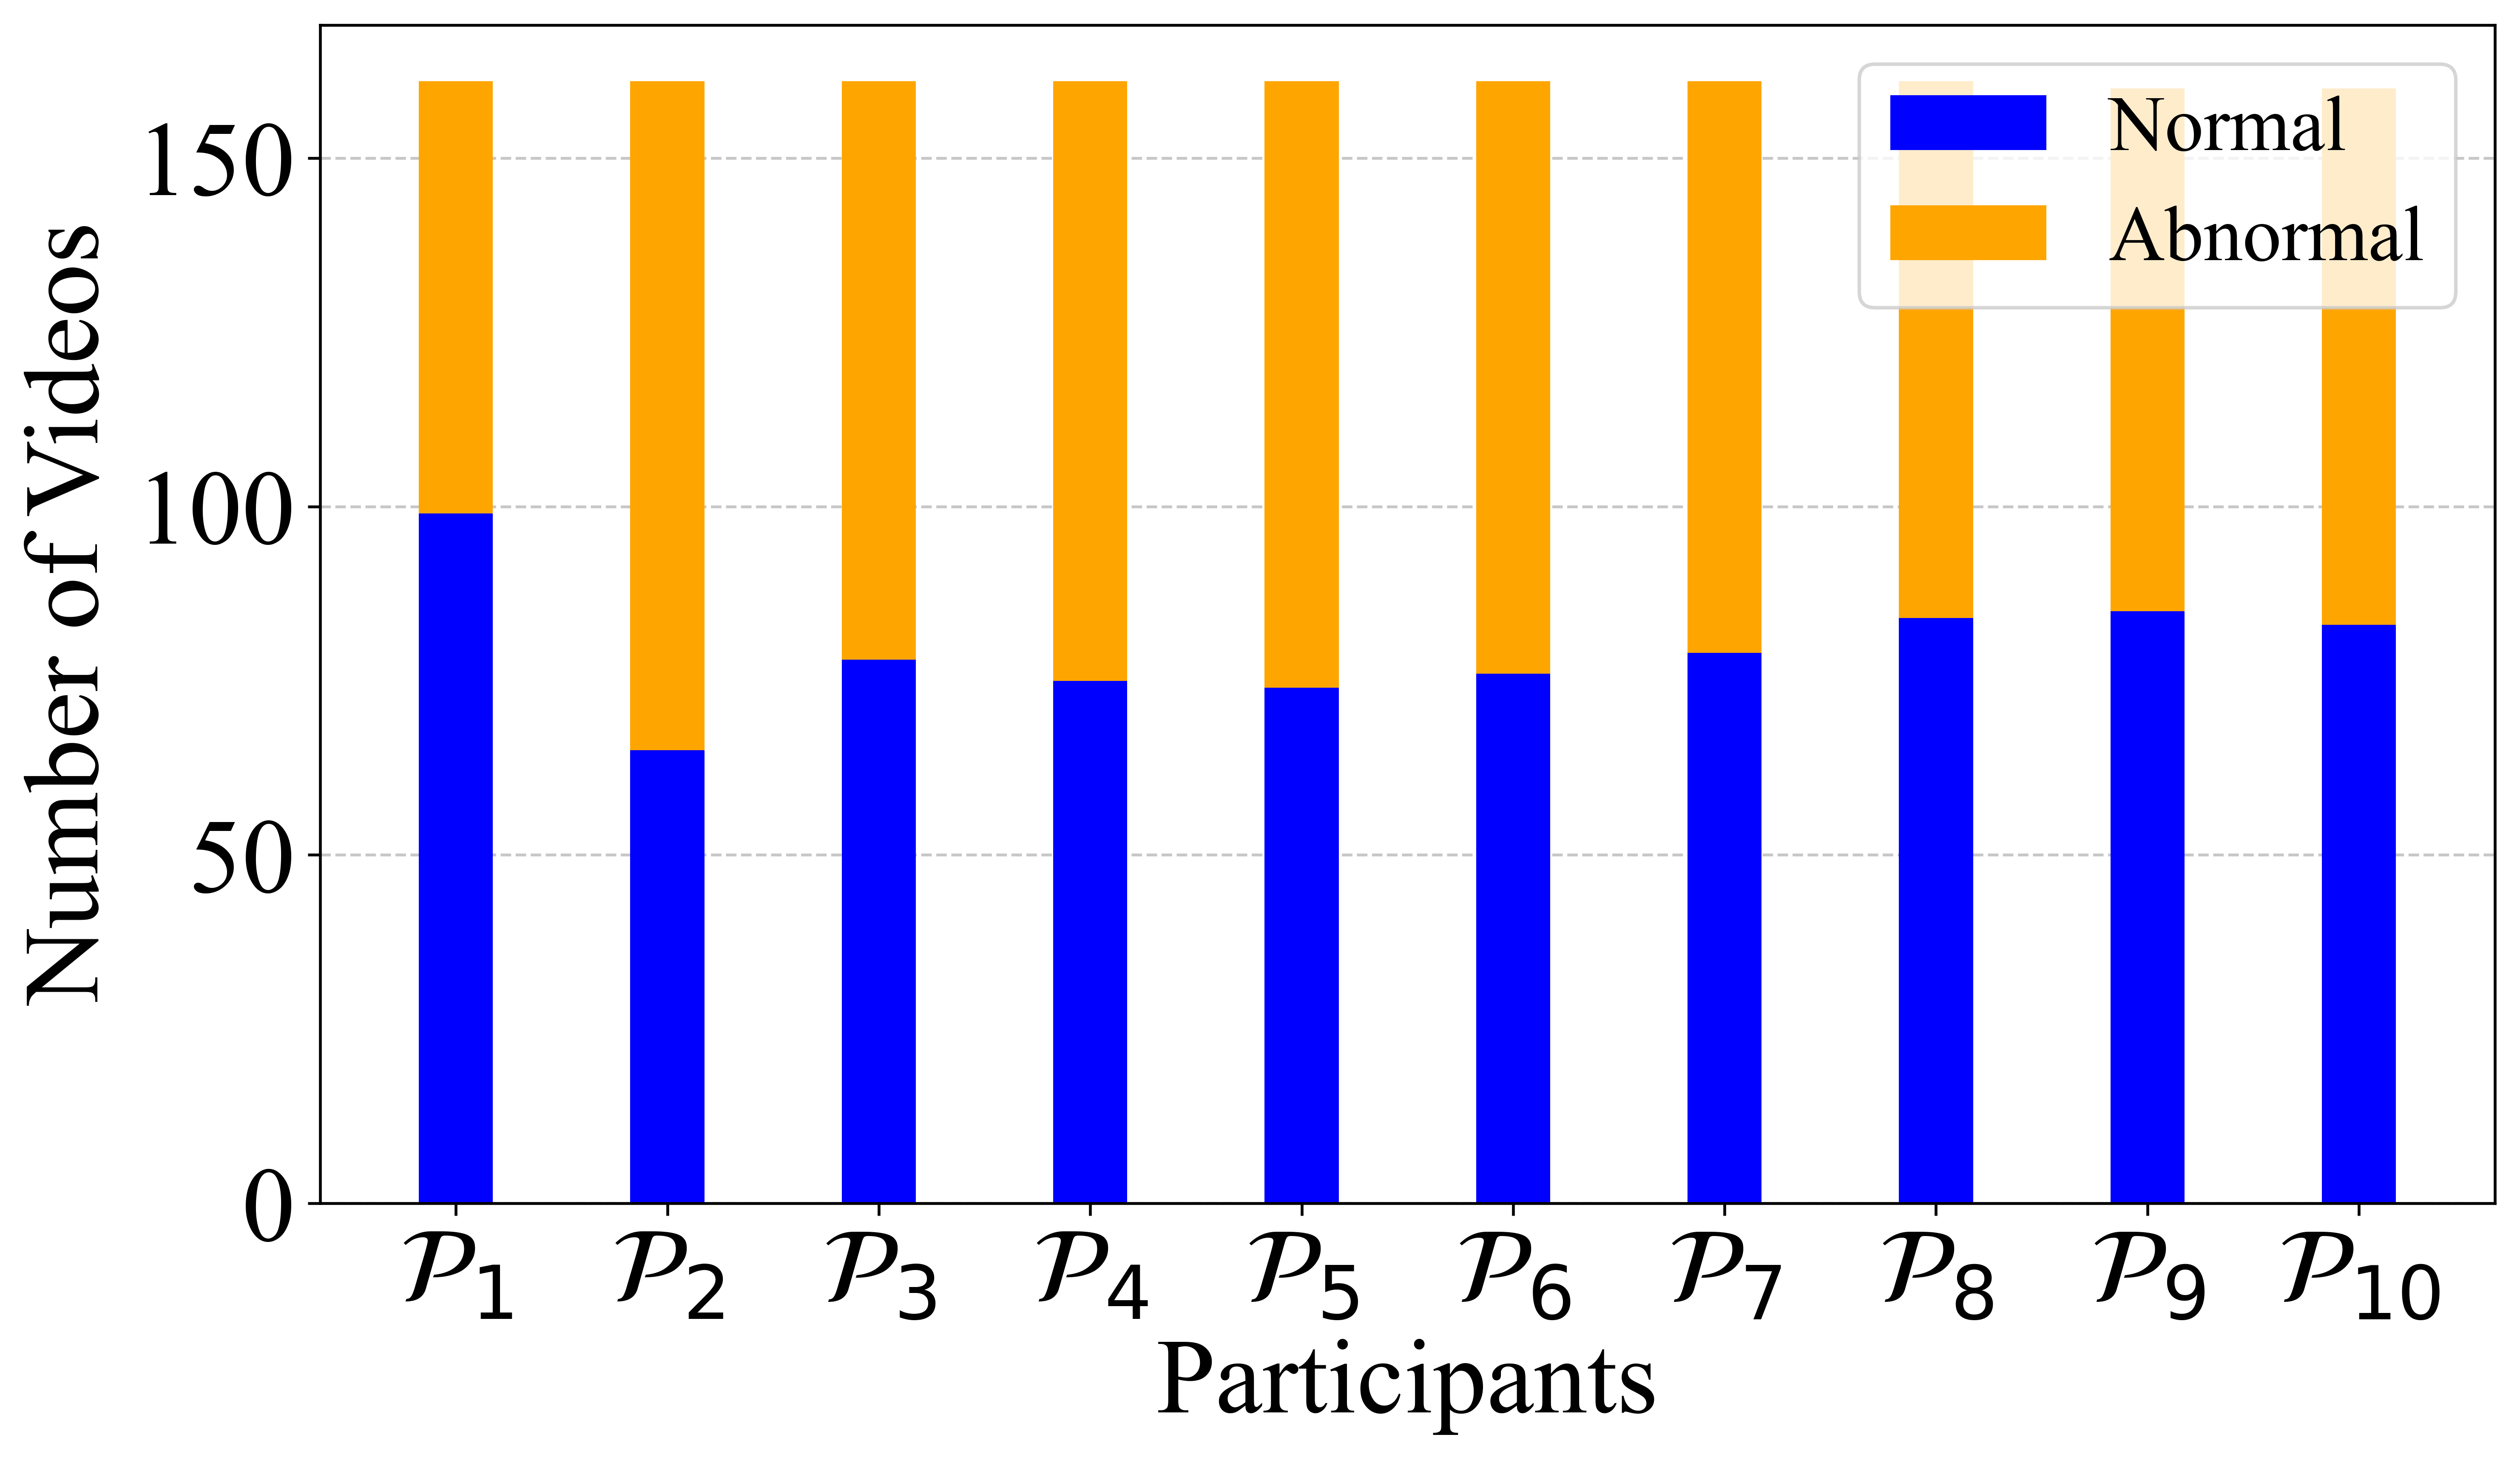

In [155]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30, 'font.family': 'Times New Roman'})
data = client_data_dist_stats_rand

clients = list(data.keys())
normal_values = [values[0] for values in data.values()]
abnormal_values = [values[1] for values in data.values()]

bar_width = 0.35
index = range(len(clients))

# Specify the size of the plot (width, height)
fig, ax = plt.subplots(figsize=(11, 6), dpi=600)

bar1 = ax.bar(index, normal_values, bar_width, label='Normal', color='blue', zorder=2)
bar2 = ax.bar(index, abnormal_values, bar_width, label='Abnormal', color='orange', bottom=normal_values, zorder=2)

ax.set_xlabel('Participants')
ax.set_ylabel('Number of Videos')
# ax.set_title('Random Ditribution', fontsize=18)    
ax.set_xticks(index)
ax.set_xticklabels(clients)
ax.legend(loc = "upper right", fontsize=22)

# Add a grid behind the bars
ax.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=1)

# Save the figure as PDF
plt.savefig('data_dist_rand.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()



In [22]:

#change rc params t


In [ ]:
# import matplotlib.pyplot as plt

# data_rand = client_data_dist_stats_rand
# data_event = client_data_dist_stats_event
# data_scene = client_data_dist_stats_scene


# clients_rand = list(data_rand.keys())
# normal_values_rand = [values[0] for values in data_rand.values()]
# abnormal_values_rand = [values[1] for values in data_rand.values()]

# clients_event = list(data_event.keys())
# normal_values_event = [values[0] for values in data_event.values()]
# abnormal_values_event = [values[1] for values in data_event.values()]


# clients_scene = list(data_scene.keys())
# normal_values_scene = [values[0] for values in data_scene.values()]
# abnormal_values_scene = [values[1] for values in data_scene.values()]


# index_rand = range(len(clients_rand))
# index_event = range(len(clients_event))
# index__scene = range(len(clients_scene))


# bar_width = 0.35


# # Create three subplots side by side
# fig, axs = plt.subplots(1, 3, figsize=(30, 6), dpi=600, sharey=True)

# # Plot for the first subplot
# bar1_1 = axs[0].bar(index_rand, normal_values_rand, bar_width, label='Normal', color='blue', zorder=2)
# bar2_1 = axs[0].bar(index_rand, abnormal_values_rand, bar_width, label='Abnormal', color='orange', bottom=normal_values, zorder=2)
# axs[0].set_xlabel('Participants')
# axs[0].set_ylabel('Number of Videos')
# axs[0].set_title('Random Partition')
# axs[0].set_xticks(index_rand)
# axs[0].set_xticklabels(clients_rand)
# axs[0].legend()
# axs[0].grid(True, axis='y', linestyle='--', alpha=0.7, zorder=1)

# # Plot for the second subplot
# bar1_2 = axs[1].bar(index_event, normal_values_event, bar_width, label='Normal', color='blue', zorder=2)
# bar2_2 = axs[1].bar(index_event, abnormal_values_event, bar_width, label='Abnormal', color='orange', bottom=normal_values, zorder=2)
# axs[1].set_xlabel('Participants')
# axs[1].set_title('Event-based Partition')
# axs[1].set_xticks(index_event)
# axs[1].set_xticklabels(clients_event)
# axs[1].grid(True, axis='y', linestyle='--', alpha=0.7, zorder=1)

# # Plot for the third subplot
# bar1_3 = axs[2].bar(index__scene, normal_values_scene, bar_width, label='Normal', color='blue', zorder=2)
# bar2_3 = axs[2].bar(index__scene, abnormal_values_scene, bar_width, label='Abnormal', color='orange', bottom=normal_values, zorder=2)
# axs[2].set_xlabel('Participants')
# axs[2].set_title('Scene-based Partition')
# axs[2].set_xticks(index__scene)
# axs[2].set_xticklabels(clients_scene)
# axs[2].grid(True, axis='y', linestyle='--', alpha=0.7, zorder=1)

# # Adjust layout
# plt.tight_layout()

# # Save the figure as PDF
# # plt.savefig('output_figure_multiple_plots.pdf', format='pdf')

# # Show the plots
# plt.show()


In [1]:
data = {"0%": 76.54,
        "33%":50,
        "66%": 25,
        "100%": 83.23}

In [79]:
plt.rcParams.update({'font.size': 16})

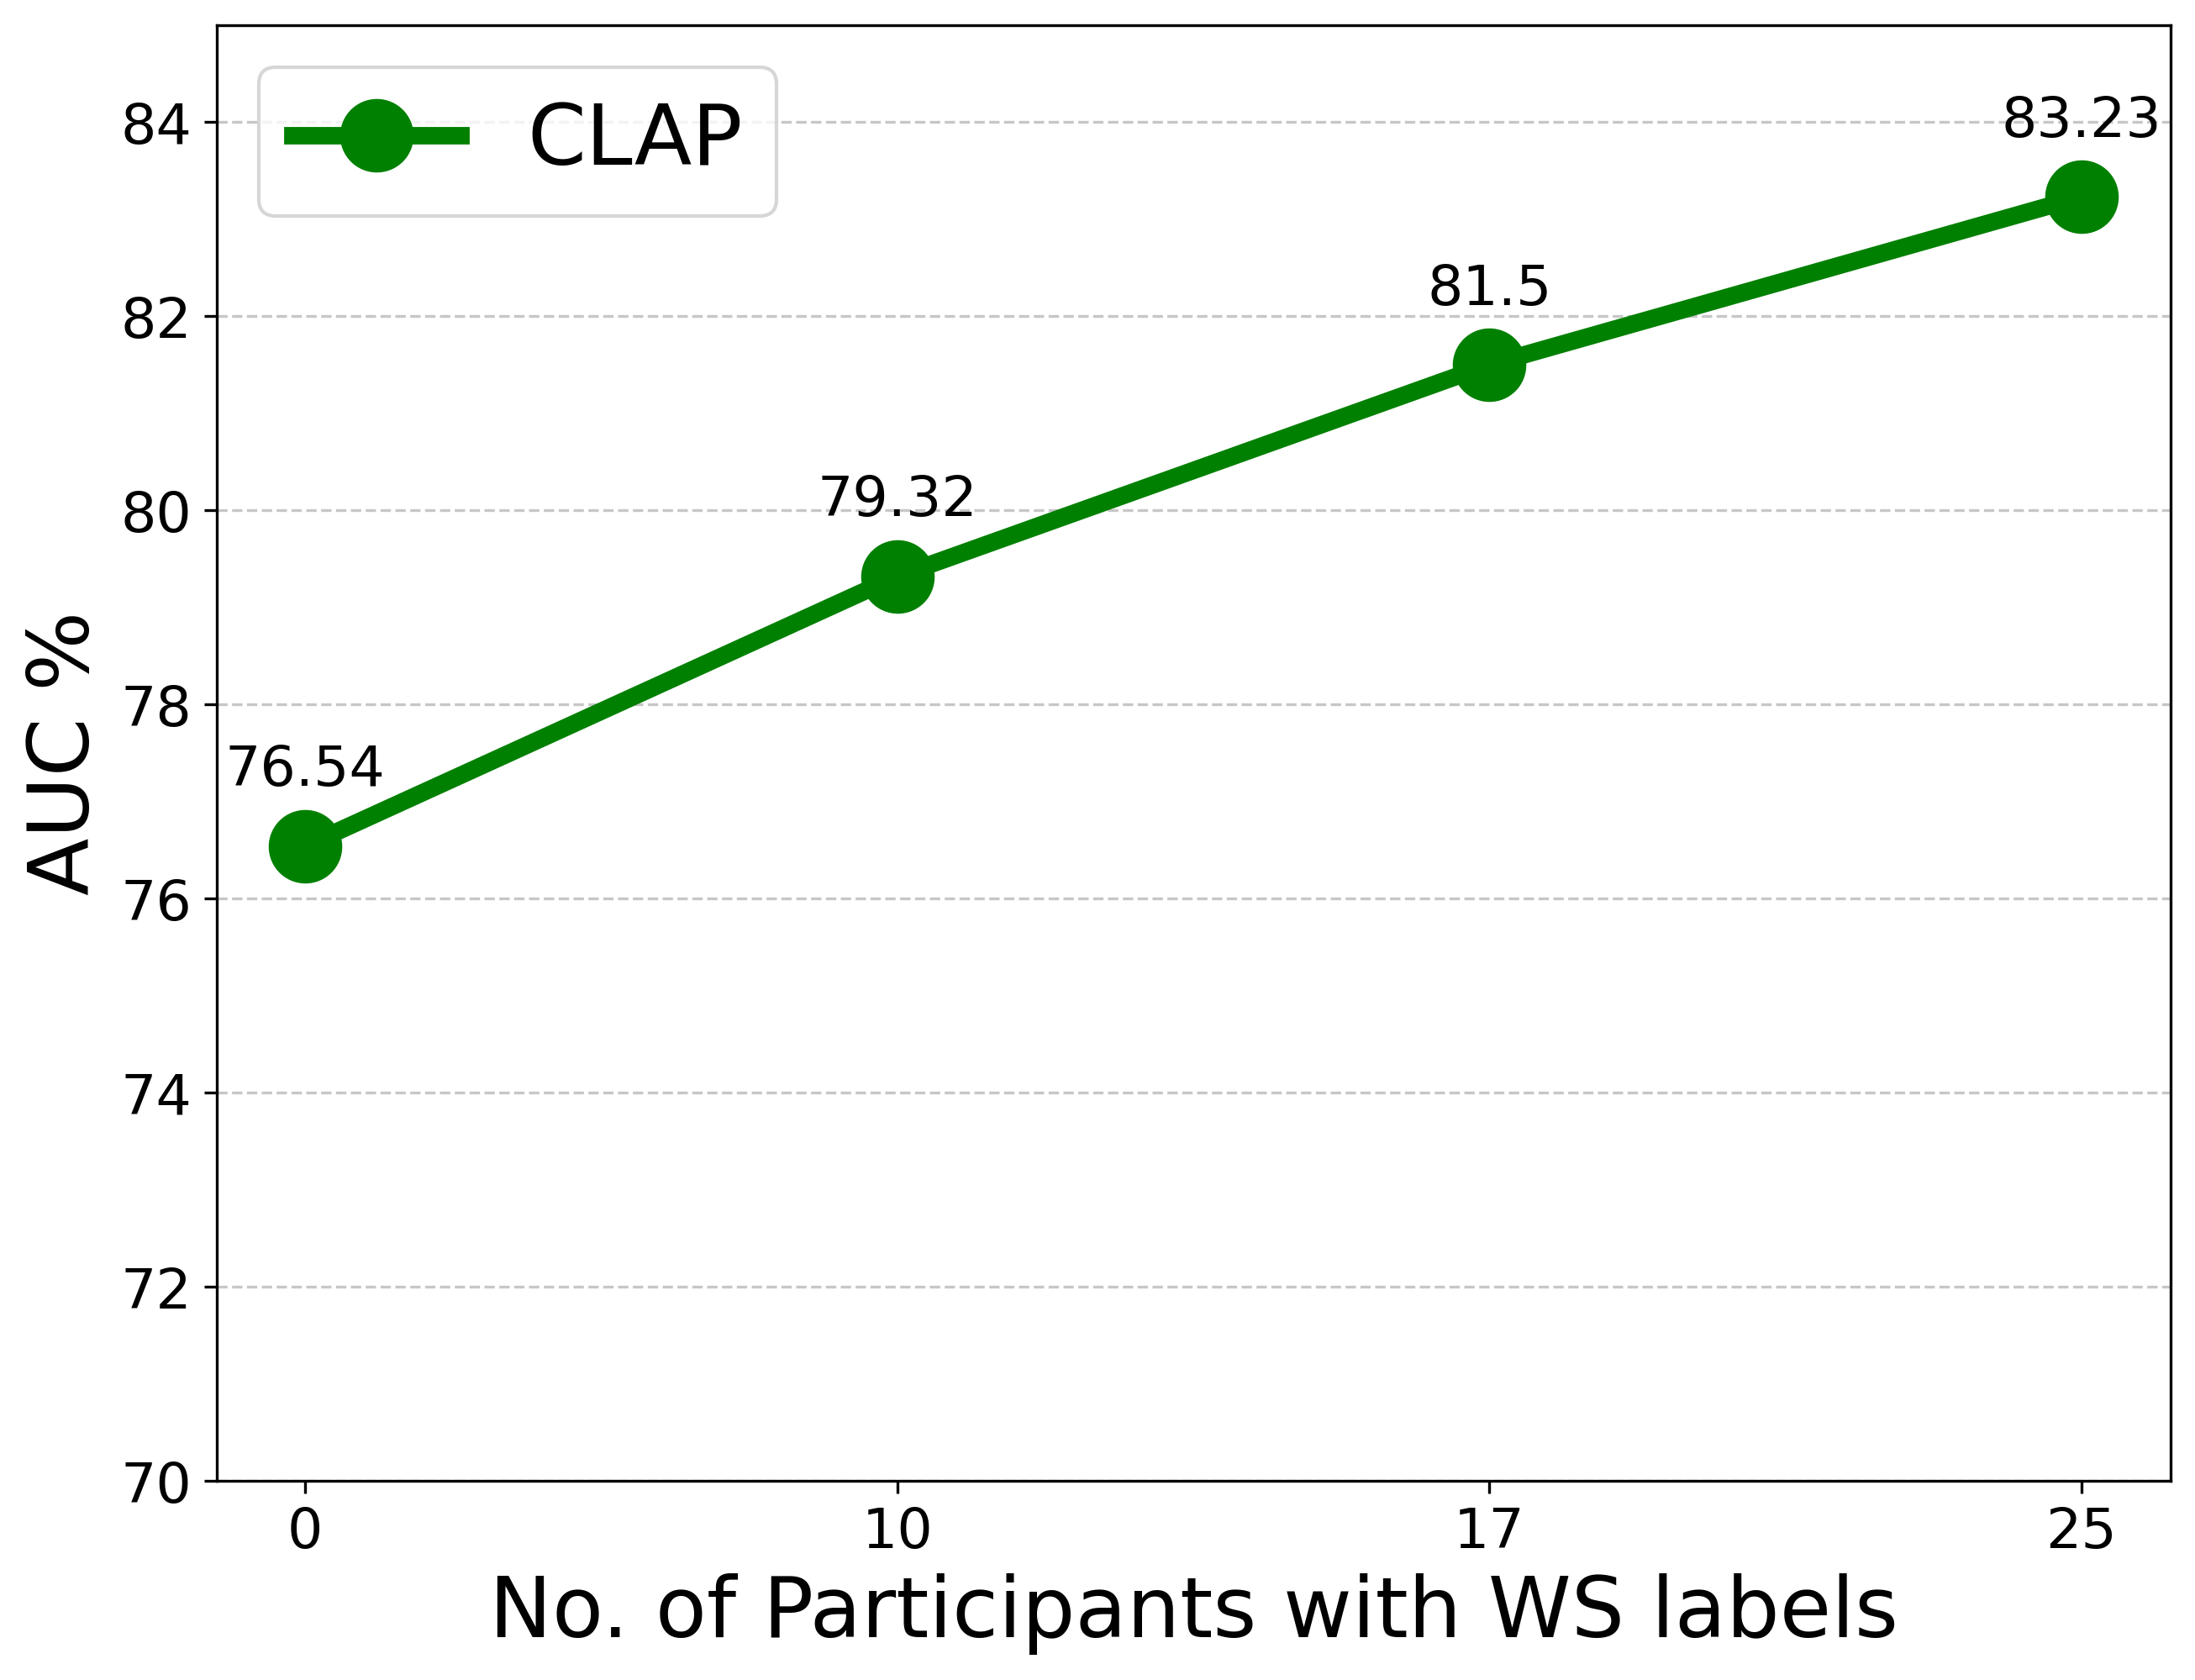

In [85]:
import matplotlib.pyplot as plt

data = {"0": 76.54,
        "10":79.32,
        "17": 81.5,
        "25": 83.23}

clients = list(data.keys())
our_values = [values for values in data.values()]
# abnormal_values = [values[1] for values in data.values()]

bar_width = 0.25
index = range(len(clients))

# Specify the size of the plot (width, height)
fig, ax = plt.subplots(figsize=(10, 7.5), dpi=300)

# bar1 = ax.bar(index, our_values, bar_width, label='CLAP', color='green', zorder=2)

#line plot
ax.plot(index, our_values, color='green', linewidth=5, marker='o', markersize=20, label='CLAP', zorder=2)

for i, v in zip(index, our_values):
    ax.text(i, v + 0.5, str(v), color='black', ha='center', va='bottom', fontsize=16)

# Add values on top of each bar
# for i, v in enumerate(our_values):
#     ax.text(i, v + 1, str(v), color='black', ha='center', va='bottom')

ax.set_xlabel('No. of Participants with WS labels', fontsize=24)
ax.set_ylabel('AUC %', fontsize=24)
# ax.set_title('Random Ditribution', fontsize=18)    
ax.set_xticks(index)
ax.set_xticklabels(clients)
ax.legend(loc = "upper left",fontsize=24)
ax.set_ylim([70, 85])
# Add a grid behind the bars
ax.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=1)

# Save the figure as PDF
plt.savefig('ws_percentage.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [98]:
plt.rcParams.update({'font.size': 16})

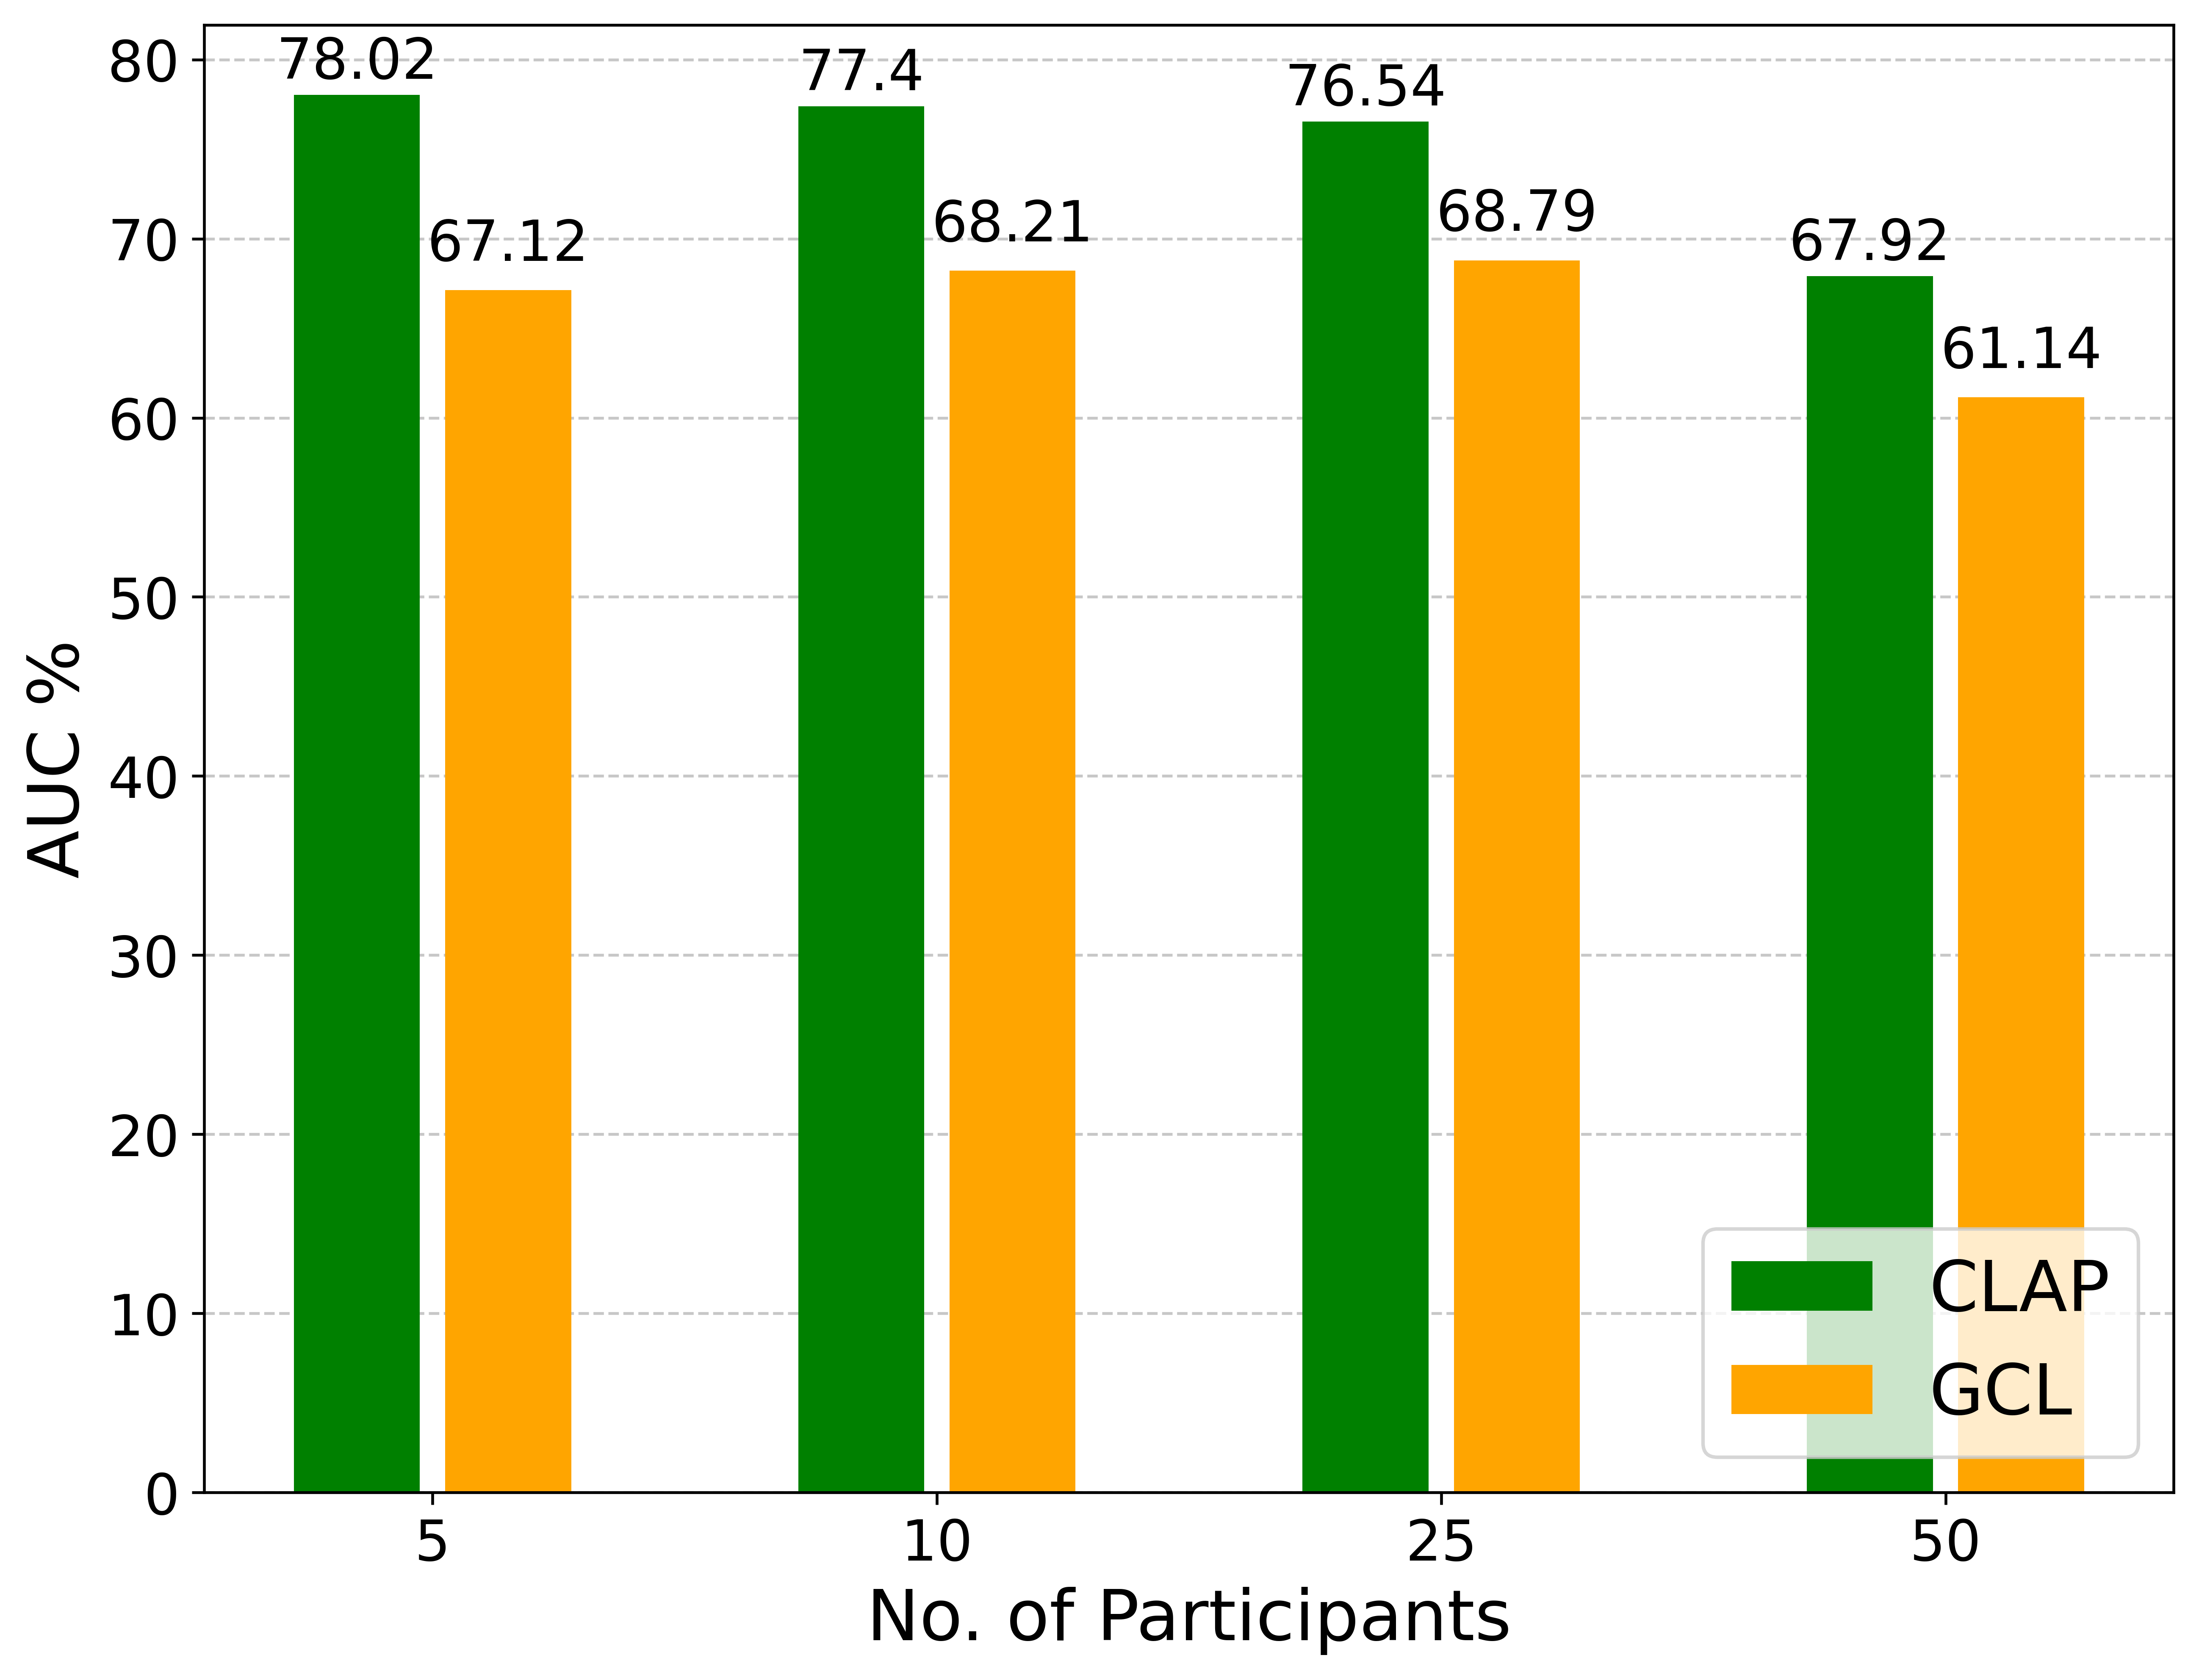

In [101]:
import matplotlib.pyplot as plt

data = {"5": [78.02, 67.12],
        "10": [77.4, 68.21],
        "25": [76.54, 68.79],
        "50": [67.92, 61.14]}

clients = list(data.keys())
clap_values = [values[0] for values in data.values()]
abnormal_values = [values[1] for values in data.values()]

bar_width = 0.25
space_width = 0.05  # Adjust the space width as needed
index = range(len(clients))

# Specify the size of the plot (width, height)
fig, ax = plt.subplots(figsize=(10, 7.5), dpi=600)

bar1 = ax.bar(index, clap_values, bar_width, label='CLAP', color='green', zorder=2)
bar2 = ax.bar([i + bar_width + space_width for i in index], abnormal_values, bar_width, label='GCL', color='orange', zorder=2)

# Add values on top of each bar
for i, v in enumerate(clap_values):
    ax.text(i, v + 0.25, str(v), color='black', ha='center', va='bottom')

for i, v in enumerate(abnormal_values):
    ax.text(i + bar_width + space_width, v + 1, str(v), color='black', ha='center', va='bottom')

# Adjust x-tick positions to be in the center of the two bars
ax.set_xticks([i + (bar_width + space_width) / 2 for i in index])
ax.set_xticklabels(clients)

ax.set_xlabel('No. of Participants', fontsize=20)
ax.set_ylabel('AUC %', fontsize=20)

# Change legend location to bottom right
ax.legend(loc='lower right', fontsize=20)

# Add a grid behind the bars
ax.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=1)

# Save the figure as PDF
plt.savefig('clap_vs_gcl.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [138]:
from matplotlib.ticker import FuncFormatter

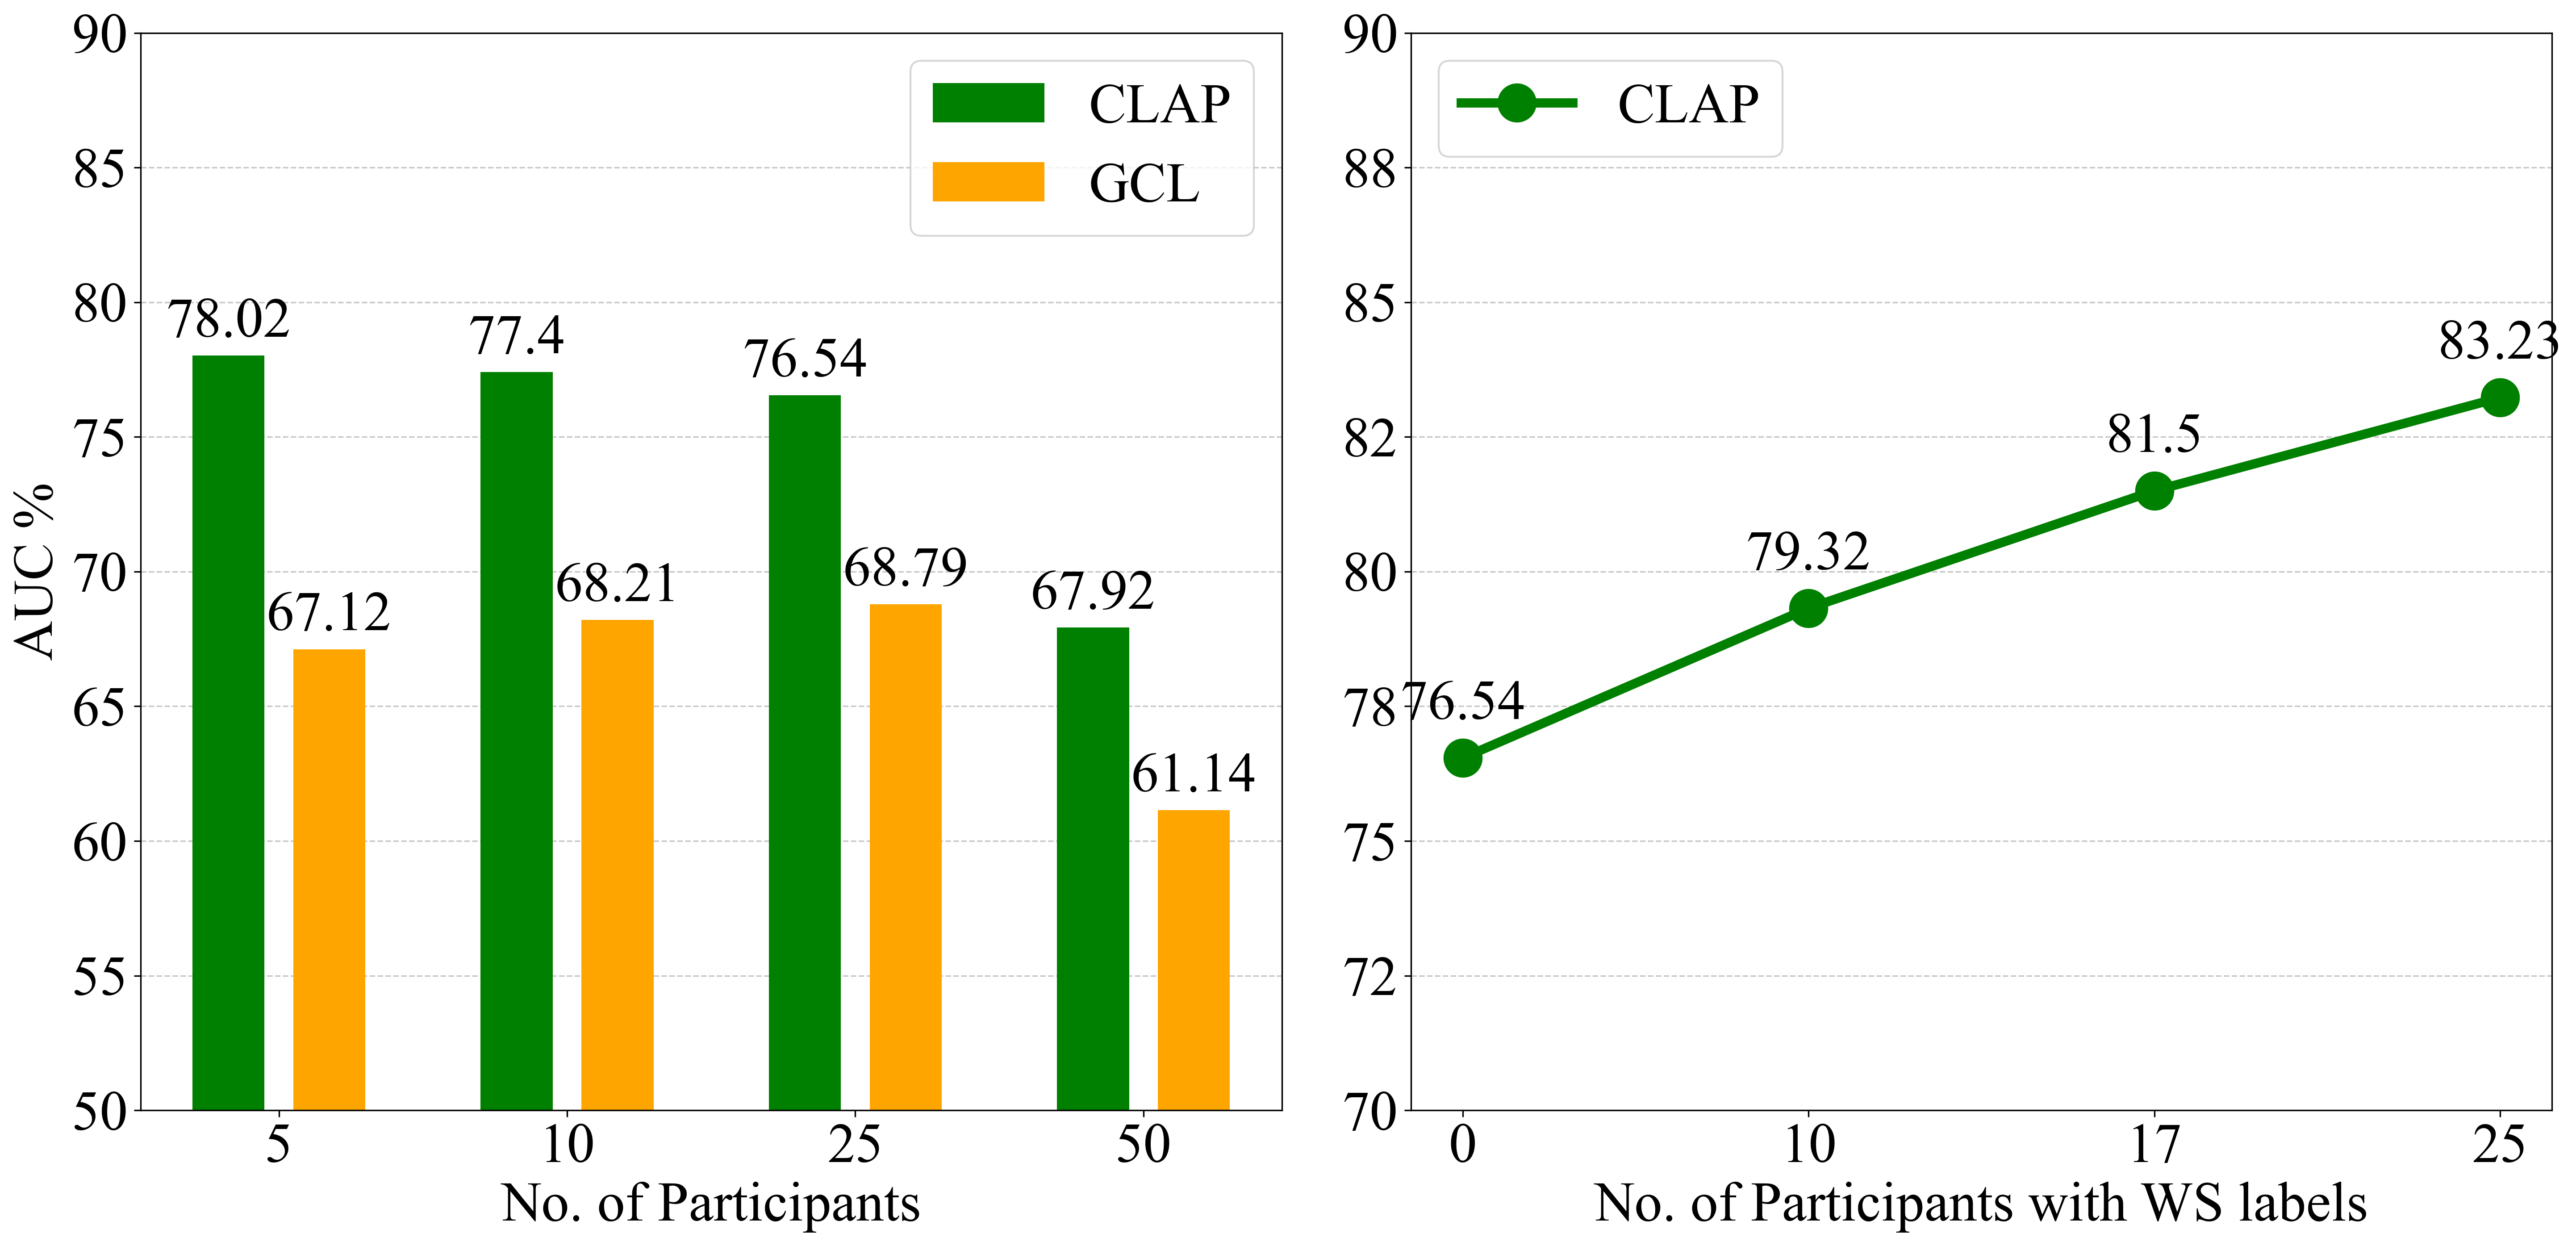

In [139]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30, 'font.family': 'Times New Roman'})
# First subplot (bar chart)
data1 = {"5": [78.02, 67.12],
         "10": [77.4, 68.21],
         "25": [76.54, 68.79],
         "50": [67.92, 61.14]}

clients1 = list(data1.keys())
clap_values1 = [values[0] for values in data1.values()]
abnormal_values1 = [values[1] for values in data1.values()]

bar_width = 0.25
space_width = 0.1  # Adjust the space width as needed
index1 = range(len(clients1))

# Second subplot (line plot)
data2 = {"0": 76.54,
         "10": 79.32,
         "17": 81.5,
         "25": 83.23}

clients2 = list(data2.keys())
our_values2 = [values for values in data2.values()]

bar_width = 0.25
index2 = range(len(clients2))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=300)

# Subplot 1: Bar chart
bar1 = axes[0].bar(index1, clap_values1, bar_width, label='CLAP', color='green', zorder=2)
bar2 = axes[0].bar([i + bar_width + space_width for i in index1], abnormal_values1, bar_width, label='GCL', color='orange', zorder=2)

for i, v in enumerate(clap_values1):
    axes[0].text(i, v + 0.25, str(v), color='black', ha='center', va='bottom')

for i, v in enumerate(abnormal_values1):
    axes[0].text(i + bar_width + space_width, v + 0.25, str(v), color='black', ha='center', va='bottom')

axes[0].set_xticks([i + (bar_width + space_width) / 2 for i in index1])
axes[0].set_xticklabels(clients1)
axes[0].set_xlabel('No. of Participants')
axes[0].set_ylabel('AUC %')
axes[0].set_ylim([50, 90])
axes[0].legend(loc='upper right')
axes[0].grid(True, axis='y', linestyle='--', alpha=0.7, zorder=1)

# Subplot 2: Line plot
axes[1].plot(index2, our_values2, color='green', linewidth=5, marker='o', markersize=20, label='CLAP', zorder=2)

for i, v in zip(index2, our_values2):
    axes[1].text(i, v + 0.5, str(v), color='black', ha='center', va='bottom')

axes[1].set_xlabel('No. of Participants with WS labels')
# axes[1].set_ylabel('AUC %')
axes[1].set_xticks(index2)
axes[1].set_xticklabels(clients2)
axes[1].legend(loc="upper left")
axes[1].set_ylim([70, 90])
axes[1].grid(True, axis='y', linestyle='--', alpha=0.7, zorder=1)


formatter = FuncFormatter(lambda y, _: '{:,.0f}'.format(y))
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)
# Adjust layout and save the figure as PDF
plt.tight_layout()
plt.savefig('subplots_figure.pdf', format='pdf', bbox_inches='tight')
plt.show()
